In [104]:
# 📦 1. Import des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [90]:
# 📂 2. Charger ton dataset enrichi
df = pd.read_csv("/content/donnees_finales_datadriven.csv")


In [91]:
# 🧹 3. Nettoyage : supprimer les lignes avec production manquante
df = df.dropna(subset=["production_tonnes"])


In [92]:
# 🎯 4. Définir X (features) et y (cible)
y = df["production_tonnes"]

# Choix des colonnes pertinentes
features = [
    "superficie_ha",
    "température moyenne", "température maximale", "température minimale",
    "vitesse du vent", "température du vent",
    "précipitations moyennes par jour", "précipitations totales sur le mois",
    "humidité", "visibilité", "couverture nuageuse",
    "irrigation", "mecanisation", "type_sol"
]

X = df[features]


In [93]:
# ⚙️ 5. Pipeline de transformation (encodage de type_sol)
categorical_features = ["type_sol"]
numeric_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(drop="first"), categorical_features)
], remainder="passthrough")


In [94]:
# 🌳 6. Créer et entraîner le modèle Random Forest
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type_sol'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [95]:
# 🔮 7. Prédictions et évaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("📊 Évaluation du modèle Random Forest :")
print("MAE :", round(mae, 2))
print("RMSE :", round(rmse, 2))
print("R² :", round(r2, 4))


📊 Évaluation du modèle Random Forest :
MAE : 223520.03
RMSE : 576104.55
R² : 0.4981


<ipython-input-102-12508a406301>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")
<ipython-input-102-12508a406301>:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


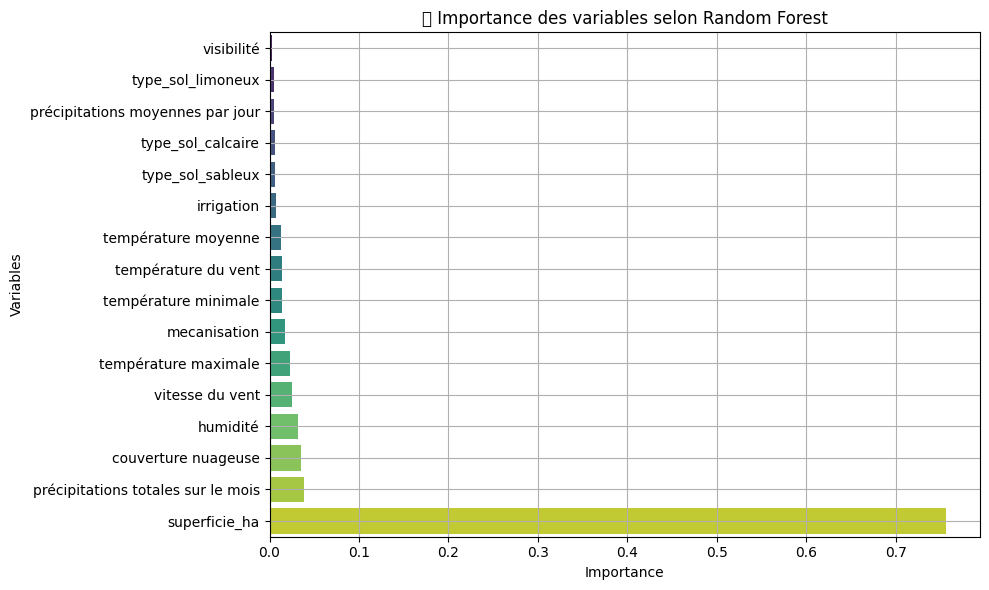

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model.fit(X_train, y_train)

# 🔍 1. Extraire le modèle Random Forest à partir du pipeline
rf_model = model.named_steps['regressor']

# 🔎 2. Récupérer les noms de colonnes après transformation
#    Cela suppose que 'preprocessor' est un ColumnTransformer
onehot_columns = list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
num_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
all_columns = onehot_columns + num_columns

# 🧠 3. Récupérer les importances
importances = rf_model.feature_importances_

# 📊 4. Construire un DataFrame trié
feat_importances = pd.Series(importances, index=all_columns).sort_values(ascending=True)

# 🎨 5. Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")
plt.title("📊 Importance des variables selon Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.grid(True)
plt.show()
